<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/4_Delay_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: delay line

### October 11th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 11/10/2021


## Configuration

### Clone the GIT

In [1]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 1439, done.
remote: Counting objects: 100% (1439/1439), done.
remote: Compressing objects: 100% (1033/1033), done.
remote: Total 1439 (delta 709), reused 935 (delta 381), pack-reused 0
Receiving objects: 100% (1439/1439), 74.52 MiB | 8.62 MiB/s, done.
Resolving deltas: 100% (709/709), done.


### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

### Importa moduli [COLAB]

In [2]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle#Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

/content
     |████████████████████████████████| 98 kB 3.9 MB/s 


### Funzioni per l'importazione file Tektronix

In [3]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

## Delay line

### Single pulses

In [4]:
DEL_shorted_pulse_2_ch1 = openTek(f'{DATADIR}/11-10-21/DL_shorted_pulse_2/F0004CH1.CSV')
DEL_shorted_pulse_2_ch2 = openTek(f'{DATADIR}/11-10-21/DL_shorted_pulse_2/F0004CH2.CSV')
DEL_matched_pulse_2_ch1 = openTek(f'{DATADIR}/11-10-21/DL_matched_pulse2/F0002CH1.CSV')
DEL_matched_pulse_2_ch2 = openTek(f'{DATADIR}/11-10-21/DL_matched_pulse2/F0002CH2.CSV')
DEL_open_pulse_2_ch1    = openTek(f'{DATADIR}/11-10-21/DL_open_pulse/F0000CH1.CSV')
DEL_open_pulse_2_ch2    = openTek(f'{DATADIR}/11-10-21/DL_open_pulse/F0000CH2.CSV')

In [5]:
DEL_shorted_pulse_2_ch1_time = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_shorted_pulse_2_ch1_sign = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_shorted_pulse_2_ch2_time = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_shorted_pulse_2_ch2_sign = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_matched_pulse_2_ch1_time = DEL_matched_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_matched_pulse_2_ch1_sign = DEL_matched_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_matched_pulse_2_ch2_time = DEL_matched_pulse_2_ch2['Data'].to_numpy().transpose()[0]
DEL_matched_pulse_2_ch2_sign = DEL_matched_pulse_2_ch2['Data'].to_numpy().transpose()[1]
DEL_open_pulse_2_ch1_time    = DEL_open_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_open_pulse_2_ch1_sign    = DEL_open_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_open_pulse_2_ch2_time    = DEL_open_pulse_2_ch2['Data'].to_numpy().transpose()[0]
DEL_open_pulse_2_ch2_sign    = DEL_open_pulse_2_ch2['Data'].to_numpy().transpose()[1]

### Repetition of pulses

### Sine: $\lambda = 2L$ - Open end

In [23]:
DL_2L_open_half    = openTek(f'{DATADIR}/11-10-21/DL_2L_open_half/F0008CH2.CSV')
DL_2L_open_out     = openTek(f'{DATADIR}/11-10-21/DL_2L_open_out/F0009CH2.CSV')
DL_2L_open_quarter = openTek(f'{DATADIR}/11-10-21/DL_2L_open_quarter/F0010CH1.CSV')
DL_2L_open_in      = openTek(f'{DATADIR}/11-10-21/DL_2L_open_half/F0008CH1.CSV')

DL_2L_open_half_t    = DL_2L_open_half['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_half_s    = DL_2L_open_half['Data'].to_numpy().transpose()[1]
DL_2L_open_out_t     = DL_2L_open_out['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_out_s     = DL_2L_open_out['Data'].to_numpy().transpose()[1]
DL_2L_open_quarter_t = DL_2L_open_quarter['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_quarter_s = DL_2L_open_quarter['Data'].to_numpy().transpose()[1]
DL_2L_open_in_t      = DL_2L_open_in['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_in_s      = DL_2L_open_in['Data'].to_numpy().transpose()[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


Text(0.5, 0, 'Base dei tempi (ns)')

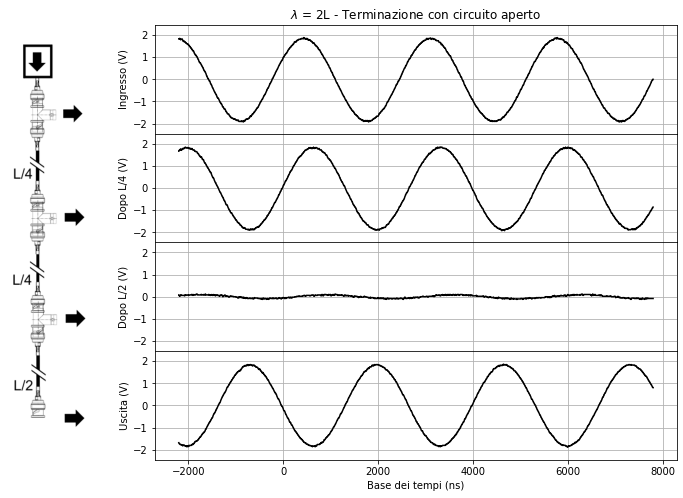

In [27]:
import cv2
im = cv2.imread(f'{OUTPUTDIR}/graphics/tl1.png')
fig3 = plt.figure(figsize = (12,8), constrained_layout=True)
gs = fig3.add_gridspec(4, 2, width_ratios=[1, 6])
f3_ax1 = fig3.add_subplot(gs[:, 0])
f3_ax1.imshow(im)
f3_ax1.axis("off")

f3_ax2 = fig3.add_subplot(gs[0, 1], title = "$\lambda$ = 2L - Terminazione con circuito aperto")
f3_ax2.plot(DL_2L_open_in_t, DL_2L_open_in_s, color = "black")
f3_ax2.set_ylim(-2.45, 2.45)
f3_ax2.grid()
f3_ax2.set_ylabel("Ingresso (V)")
#PLOT INPUT

f3_ax3 = fig3.add_subplot(gs[1, 1], sharex = f3_ax2)
f3_ax3.plot(DL_2L_open_quarter_t, DL_2L_open_quarter_s, color = "black")
f3_ax3.set_ylim(-2.45, 2.45)
f3_ax3.grid()
f3_ax3.set_ylabel("Dopo L/4 (V)")
#PLOT L/4

f3_ax4 = fig3.add_subplot(gs[2, 1], sharex = f3_ax2)
f3_ax4.plot(DL_2L_open_half_t, DL_2L_open_half_s, color = "black")
f3_ax4.set_ylim(-2.45, 2.45)
f3_ax4.grid()
f3_ax4.set_ylabel("Dopo L/2 (V)")
#PLOT L/2

f3_ax5 = fig3.add_subplot(gs[3, 1], sharex = f3_ax2)
f3_ax5.plot(DL_2L_open_out_t, DL_2L_open_out_s, color = "black")
f3_ax5.set_ylim(-2.45, 2.45)
f3_ax5.grid()
f3_ax5.set_ylabel("Uscita (V)")
#PLOT L

f3_ax2.get_shared_x_axes().join(f3_ax4, f3_ax2, f3_ax3, f3_ax5)
plt.subplots_adjust(hspace=.0)

yticks = f3_ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax3.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax4.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax5.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

f3_ax5.set_xlabel("Base dei tempi (ns)")

### Sine: $\lambda = 2L$ - Shorted end

### Sine: $\lambda = 2L$ - Matched end

### Sine: $\lambda = L$ - Open end

### Sine: $\lambda = L$ - Shorted end

### Sine: $\lambda = L$ - Matched end

## Commit changes

In [ ]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 